In [5]:
import qiskit
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import plot_histogram

In [6]:
statevector_simulator = qiskit.Aer.get_backend("statevector_simulator")
qasm_simulator = qiskit.Aer.get_backend("qasm_simulator")

def do_job (circuit):
    result = qiskit.execute(circuit, backend = statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure ([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = qiskit.execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

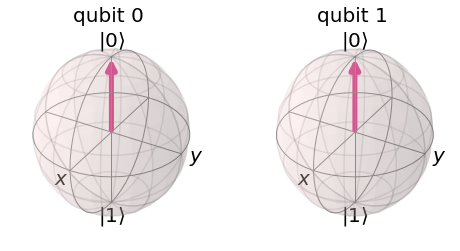

In [8]:
circuit = qiskit.QuantumCircuit (2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

In [17]:
circuit = qiskit.QuantumCircuit (2, 2)
statevec, counts = do_job(circuit)

circuit.x(0)
circuit.h(0)
circuit.x(0)

circuit.h(1)

orig_statevec = qiskit.execute (circuit, backend=statevector_simulator).result().get_statevector()

circuit.measure([0, 1], [1, 0])

circuit.draw()

┌─┐┌───┐┌───┐┌───┐┌─┐
q_0: |0>┤M├┤ X ├┤ H ├┤ X ├┤M├
        └╥┘└┬─┬┘├───┤└┬─┬┘└╥┘
q_1: |0>─╫──┤M├─┤ H ├─┤M├──╫─
         ║  └╥┘ └───┘ └╥┘  ║ 
 c_0: 0 ═╩═══╬═════════╩═══╬═
             ║             ║ 
 c_1: 0 ═════╩═════════════╩═

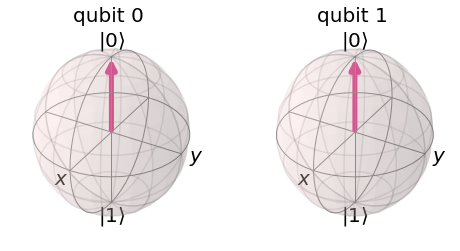

In [18]:
plot_bloch_multivector(statevec)

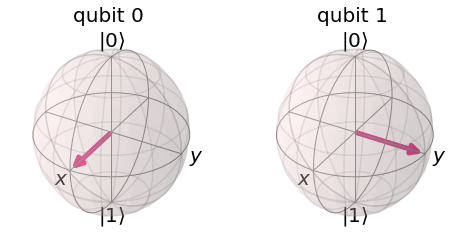

In [27]:
from math import pi

circuit = qiskit.QuantumCircuit(2, 2)
circuit.h(0)
circuit.h(1)
circuit.rz(pi / 2, 1)

statevec, counts = do_job(circuit)
plot_bloch_multivector (statevec)

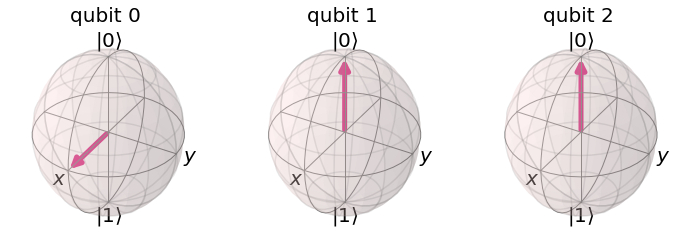

In [42]:

qbit = qiskit.QuantumRegister(3)
stbit = qiskit.ClassicalRegister(3)

circuit = qiskit.QuantumCircuit (qbit, stbit)

circuit.h(qbit[0])
circuit.h(qbit[1])
circuit.h(qbit[2])

circuit.cx(qbit[0], qbit[1])
circuit.cx(qbit[0], qbit[2])

circuit.h(qbit[1])
circuit.h(qbit[2])

statevec, counts = do_job(circuit)
plot_bloch_multivector (statevec)

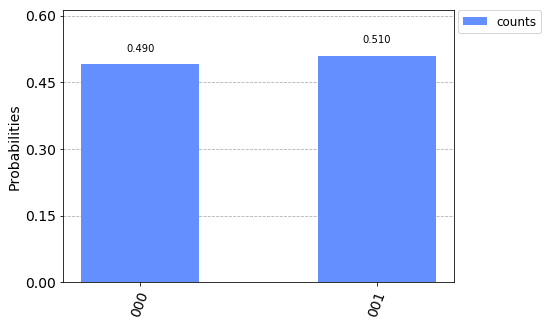

In [43]:
orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

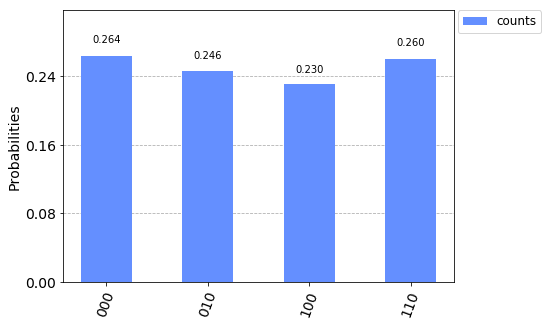

In [64]:
circuit = qiskit.QuantumCircuit (3, 3)

circuit.h(0)

circuit.cx(1, 2)
circuit.cx(0, 1)

circuit.h(1)

circuit.measure([0, 1], [1, 2])

orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

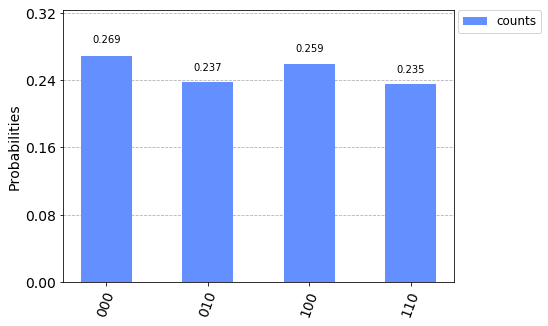

In [69]:
circuit = qiskit.QuantumCircuit (3, 3)

circuit.h(0)

circuit.cx(1, 2)
circuit.cx(0, 1)

circuit.h(1)

circuit.measure([0, 1], [1, 2])

orig_counts = qiskit.execute (circuit, backend = qasm, shots=2048).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

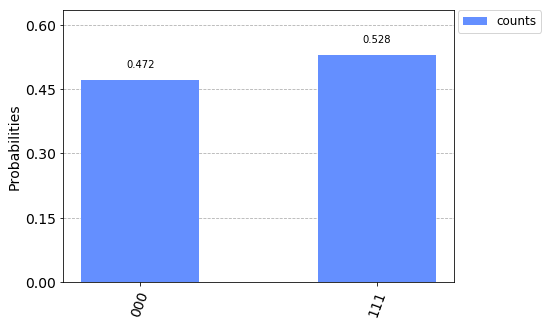

In [80]:
from math import pi

circuit = qiskit.QuantumCircuit (3, 3)

circuit.h(0)

circuit.cx(1, 2)
circuit.h(2)

#circuit.rx(pi/2, 1)

circuit.cx(0, 1)

circuit.measure([0, 1], [1, 2])
circuit.measure([0, 1], [1, 0])

orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

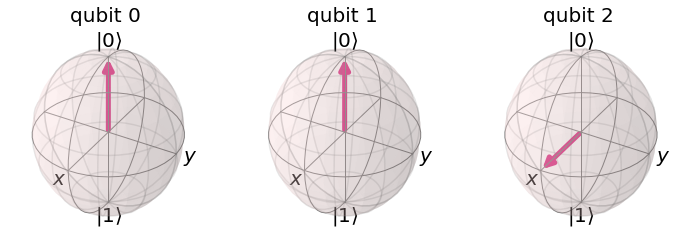

In [81]:
statevec, counts = do_job(circuit)
plot_bloch_multivector (statevec)

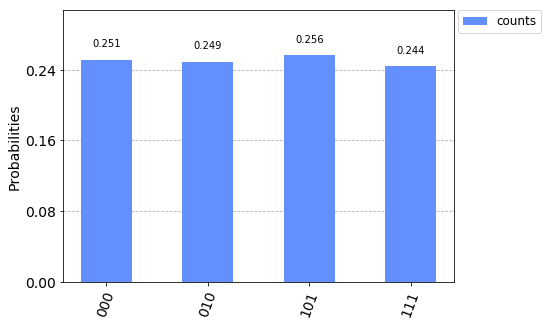

In [92]:
circuit = qiskit.QuantumCircuit (3, 3)

circuit.h(0)

circuit.cx(1, 2)
circuit.h(2)

circuit.rx(pi/2, 0)
circuit.rx(pi/2, 1)
circuit.rx(pi/2, 2)

circuit.cx(0, 1)

circuit.measure([0, 1], [1, 2])
circuit.measure([0, 1], [1, 0])

orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

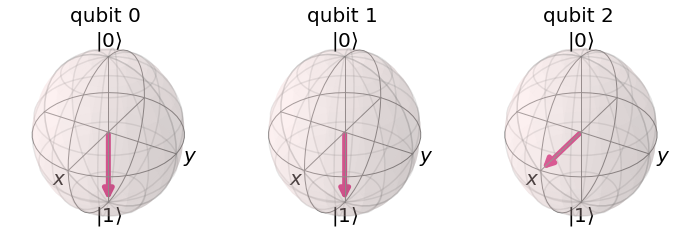

In [93]:
statevec, counts = do_job(circuit)
plot_bloch_multivector (statevec)